In [2]:
#importing packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
df= pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')

In [5]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [8]:
#droping the last 2 rows 
df.drop(105, axis=0, inplace= True)

In [9]:
df.drop(106 , axis=0, inplace=True)

In [10]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
#cleaning columns name
df.columns =['month', 'sales']
df.head()

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [12]:
df['month']=pd.to_datetime(df['month'])

In [13]:
df.set_index('month', inplace=True)

In [14]:
df

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [15]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### **EDA**

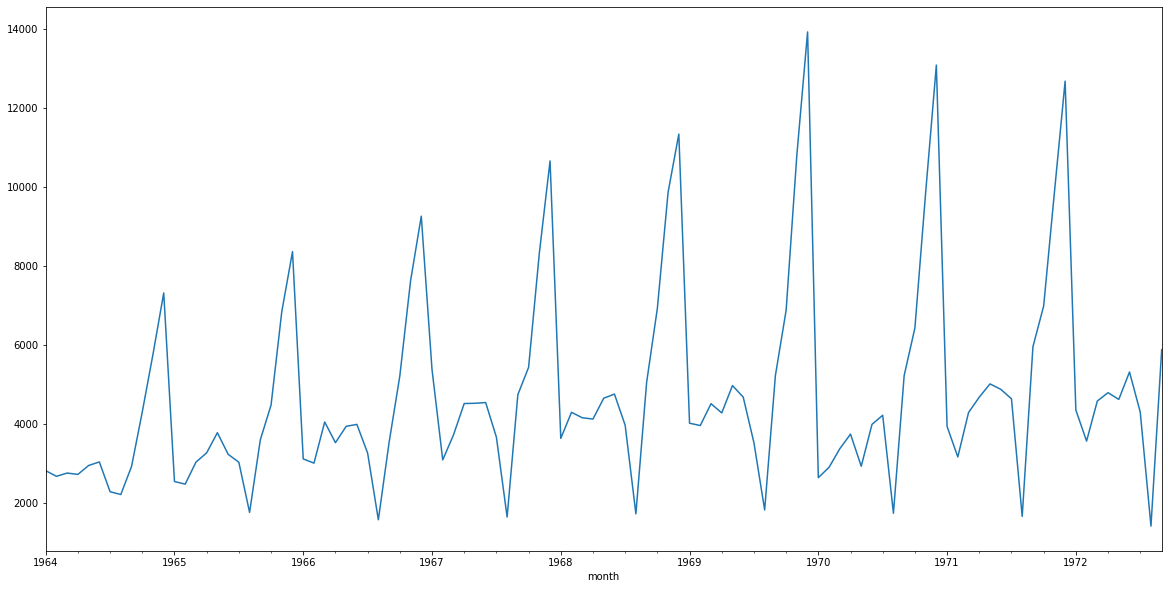

In [16]:
df['sales'].plot(figsize=(20,10))

In [17]:
! pip install statsmodels 

In [18]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
test_result= adfuller(df['sales'])

In [20]:
#H0:it is non stationary 
#H1:it's stationary 

def adfuller_test(sales):
   result= adfuller(sales)
   labels= ['ADF', 'p-value','#Lags Used','Number of Observations Used']
   for value , label in zip(result , labels):
     print(label +' : '+ str(value))
   if result[1]<=0.05:
     print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
   else:
     print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [21]:
adfuller_test(df['sales'])

ADF : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### **Differecing**

In [22]:
df['sales first difference']=df['sales']- df['sales'].shift(1)
df['seasonal first difference']=df['sales']- df['sales'].shift(12)

In [23]:
df.head()

,sales,sales first difference,seasonal first difference
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [24]:
 #test ADF again 
 adfuller_test(df['seasonal first difference'].dropna())

ADF : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


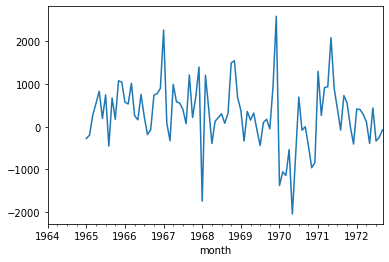

In [25]:
df['seasonal first difference'].plot()

## Auto Regressive Model


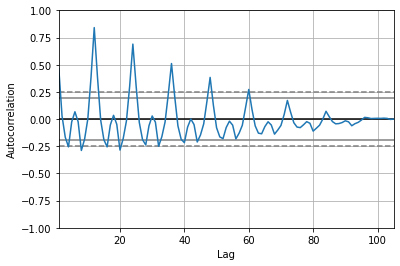

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

# *Thoughts about autocorrelation and partial autocorrelation*

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #p AR model , d differencing , q MA lags

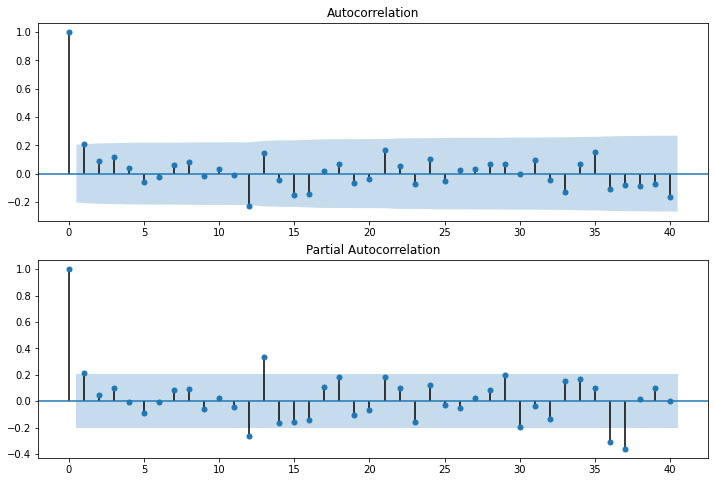

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax2)

In [29]:
# for non seasonal data 
#p=1 , d= 1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA

In [30]:
model =ARIMA(df['sales'], order=(1,1,1))
model_fit= model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 08 Nov 2021   AIC                           1910.251
Time:                        07:34:35   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7848     12.405      1.837      0.069      -1.529      47.099
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
import statsmodels.api as sm

In [33]:
model = sm.tsa.statespace.SARIMAX(df['sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
show= model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


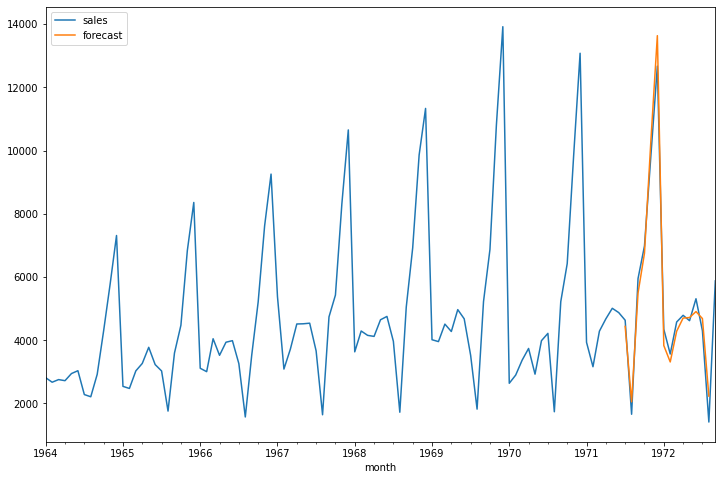

In [34]:
df['forecast']=show.predict(start=90 , end=103 , dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_data= [df.index[-1]+DateOffset(months=x) for x in range (0, 24)]

In [36]:
future_data= pd.DataFrame(index= future_data[1:], columns= df.columns)

In [38]:
future_df=pd.concat([df,future_data])

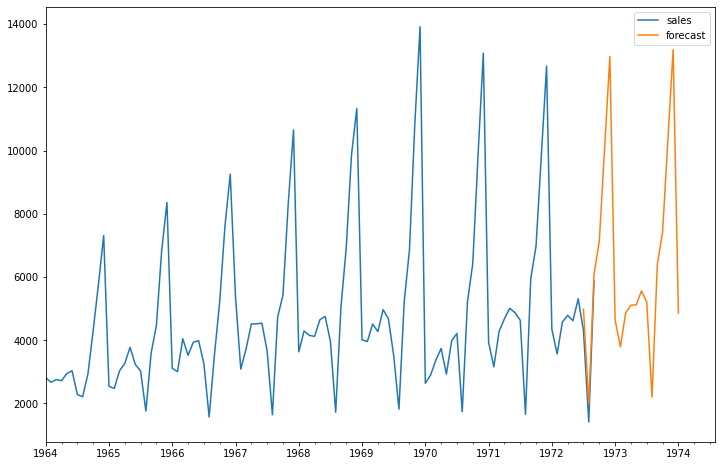

In [39]:
future_df['forecast']=show.predict(start=102 , end=120 , dynamic=True)
future_df[['sales','forecast']].plot(figsize=(12,8))